Dataset Information:
Number of records: 300
Number of features: 13

Missing Values:
Speed_Limit    1
dtype: int64

Basic Statistics for Numerical Features:
       Number_of_Deaths  Speed_Limit
count        299.000000   299.000000
mean           1.755853    56.989967
std            1.076249    13.042390
min            0.000000    30.000000
25%            1.000000    50.000000
50%            2.000000    60.000000
75%            2.500000    60.000000
max            5.000000    90.000000

Accident Reasons Distribution:
Reason
Speeding                84
Drunk driving           59
Poor road conditions    54
Driver fatigue          52
Driver Fatigue          18
Poor Road Conditions    16
Drunk Driving           16
Name: count, dtype: int64
Dataset Information:
Number of records: 299
Number of features: 13

Missing Values:
Series([], dtype: int64)

Basic Statistics for Numerical Features:
       Number_of_Deaths  Speed_Limit
count        299.000000   299.000000
mean           1.755853    56.98

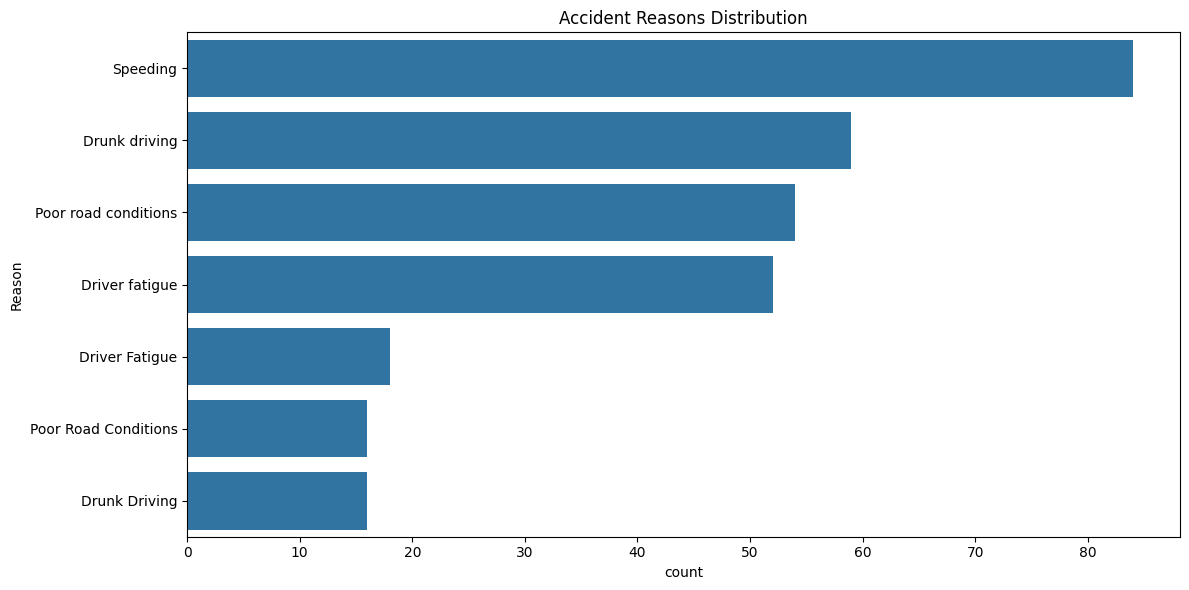

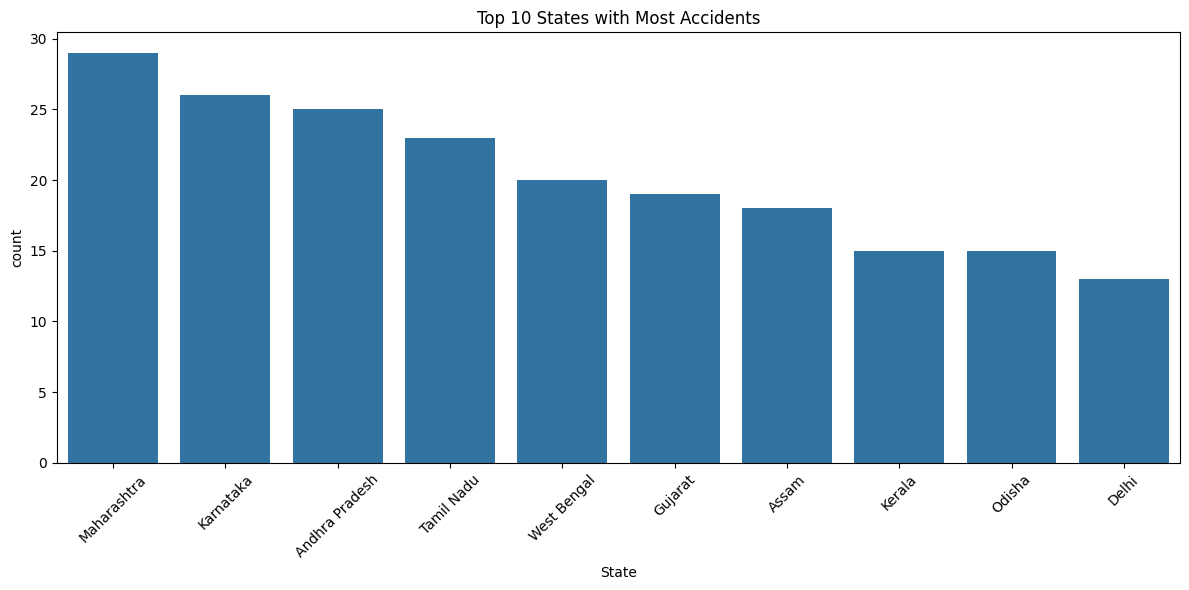

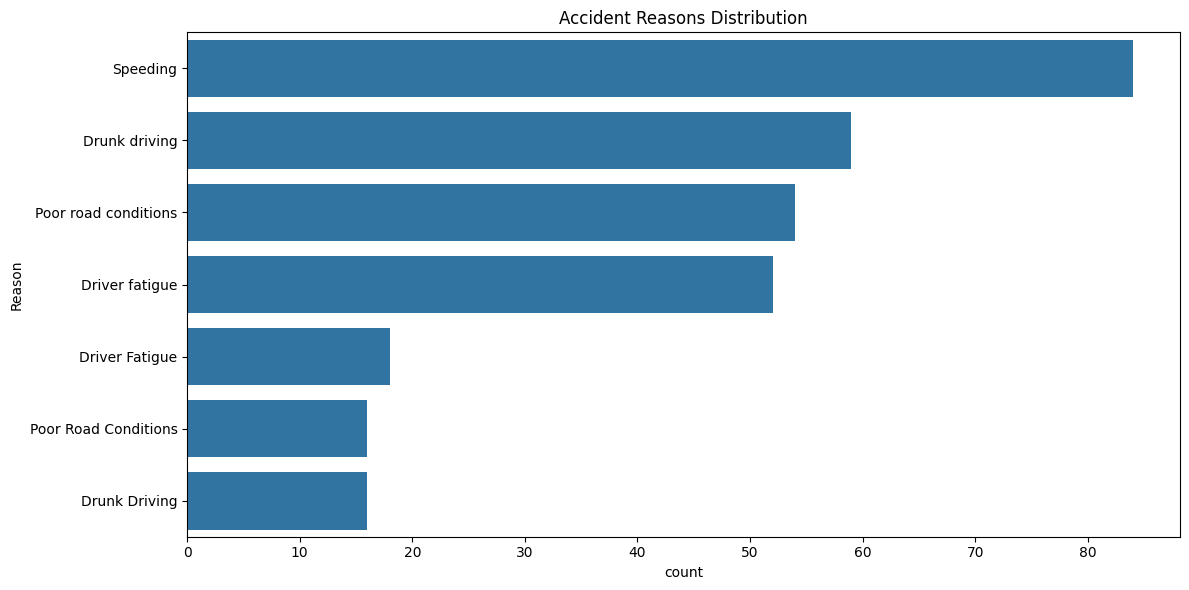

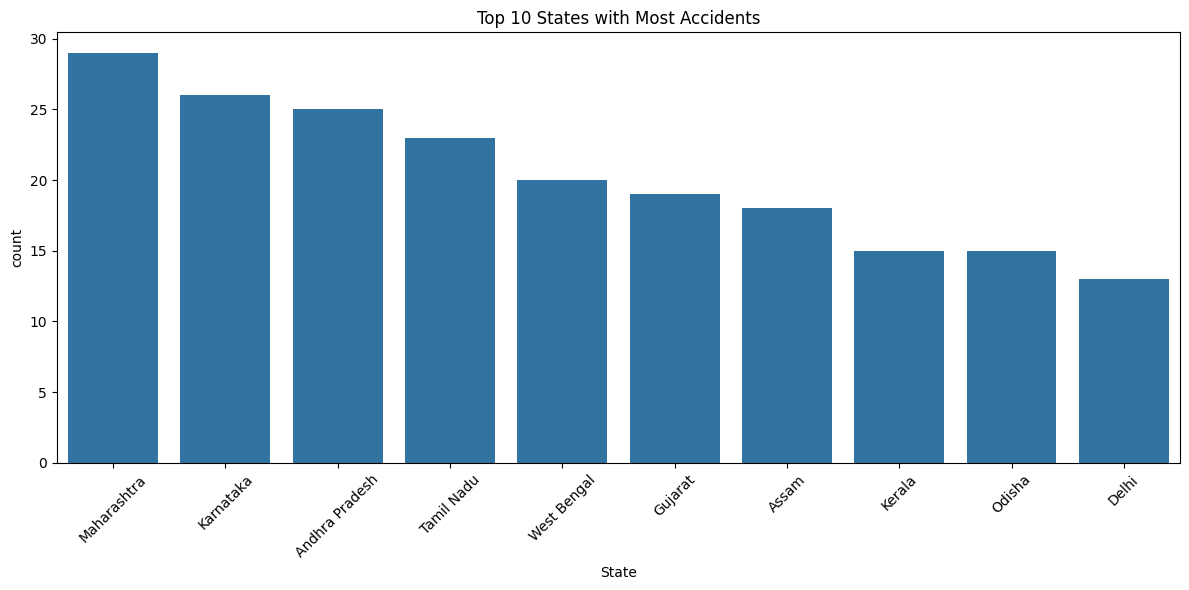

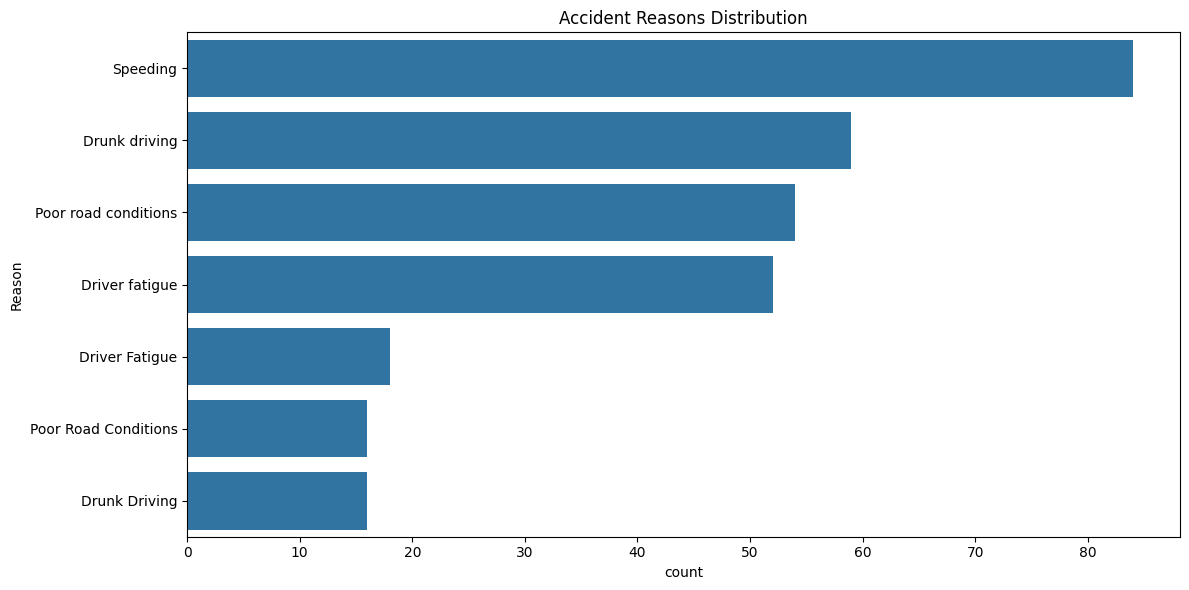

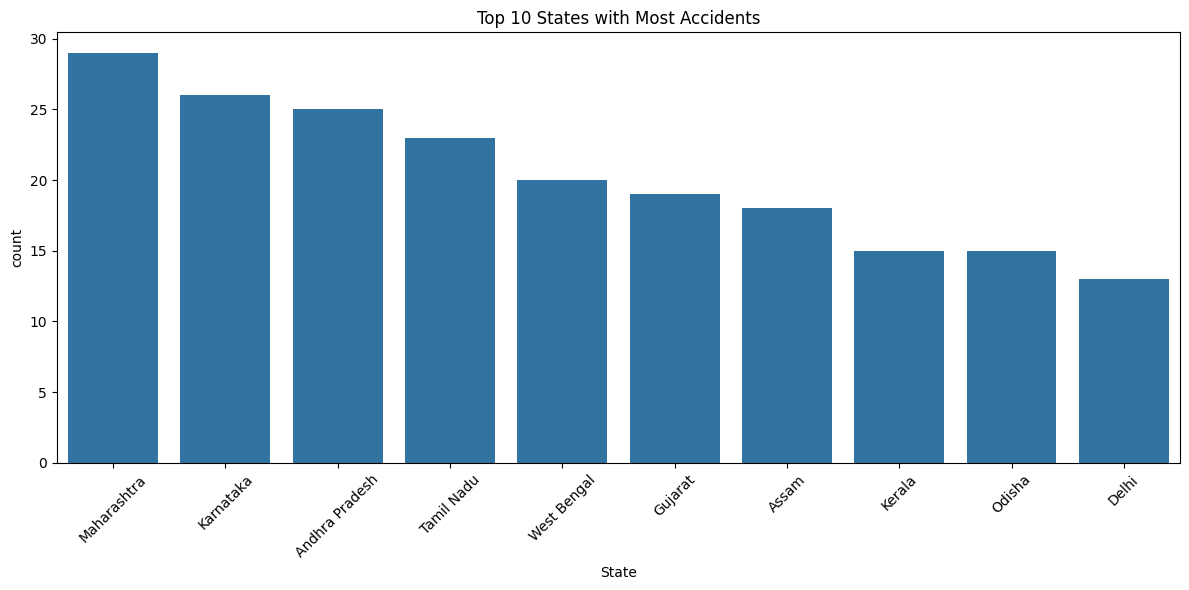

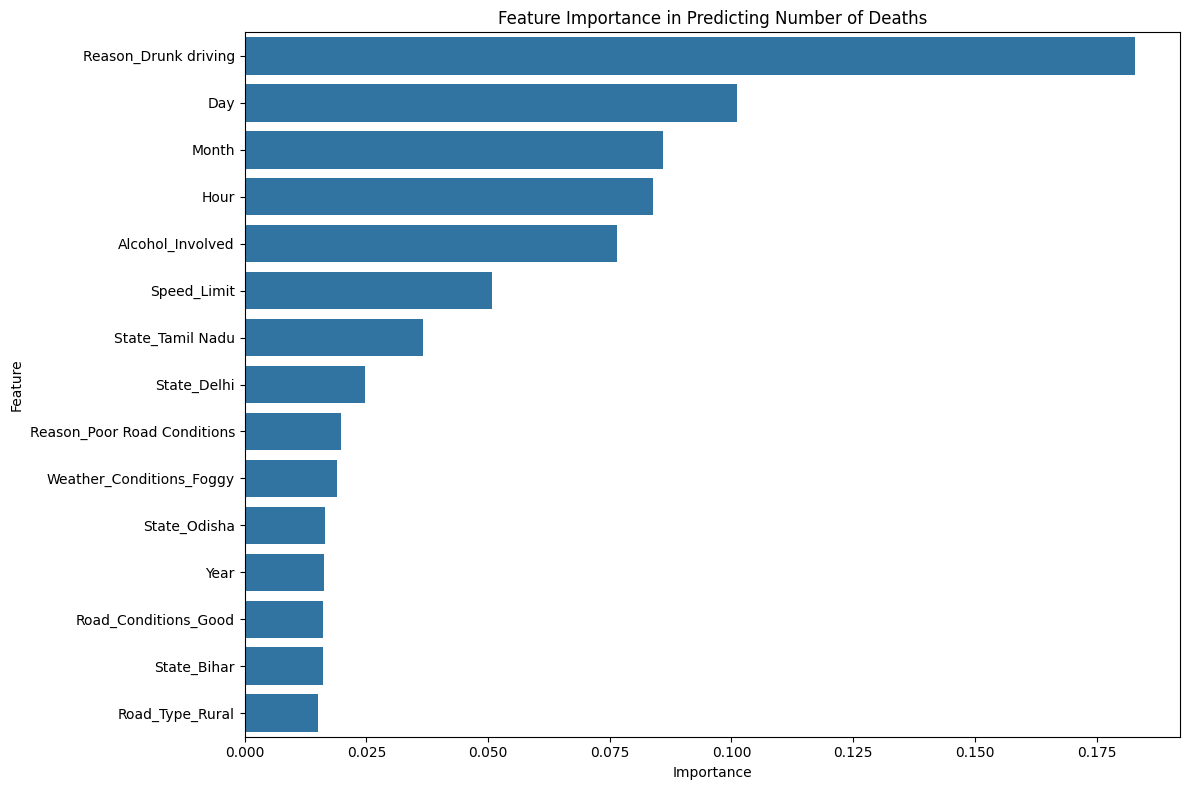

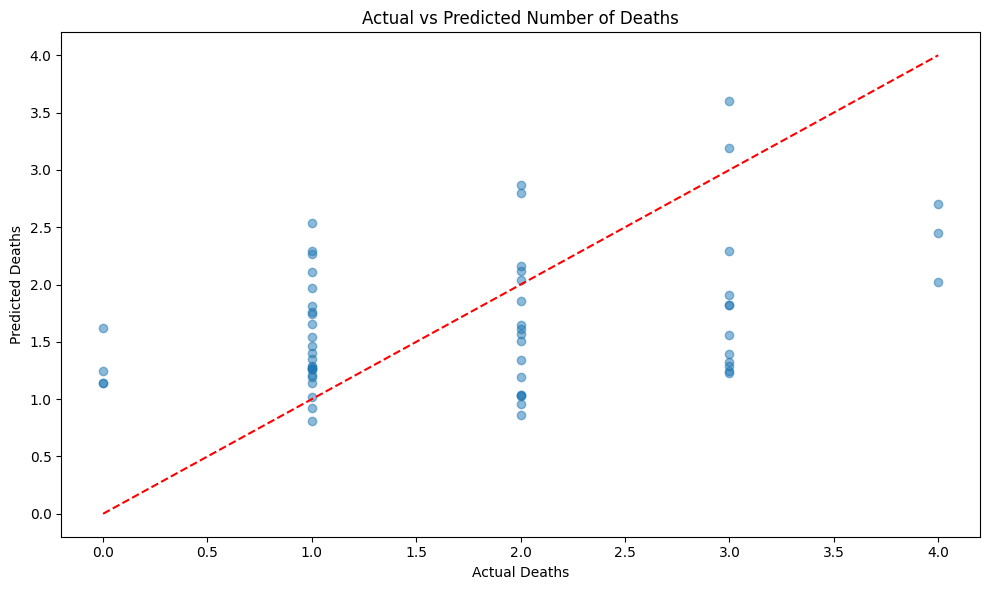

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file
def read_csv_file():
    try:
        # Try to read the CSV file directly from the path
        df = pd.read_csv("accident.csv")
        return df
    except:
        # If file not found, try to read from the upload
        try:
            import io

            # For web environments where files are uploaded and accessible via window.fs
            # Ensure this works in the environment where this code is executed
            file_content = window.fs.readFile("accident.csv", { encoding: 'utf8' })
            df = pd.read_csv(io.StringIO(file_content))
            return df
        except:
            print("Error reading the CSV file. Please make sure the file is uploaded correctly.")
            return None

# Load data
df = read_csv_file()

if df is not None:
    # Display basic info about the dataset
    print("Dataset Information:")
    print(f"Number of records: {df.shape[0]}")
    print(f"Number of features: {df.shape[1]}")

    # Check for missing values
    missing_values = df.isnull().sum()
    print("\nMissing Values:")
    print(missing_values[missing_values > 0])

    # Drop rows with missing values if any
    df = df.dropna()

    # Display basic statistics
    print("\nBasic Statistics for Numerical Features:")
    print(df.describe())

    # Data Exploration
    print("\nAccident Reasons Distribution:")
    reason_counts = df['Reason'].value_counts()
    print(reason_counts)

    # Create visualization
    plt.figure(figsize=(12, 6))
    sns.countplot(y='Reason', data=df, order=df['Reason'].value_counts().index)
    plt.title('Accident Reasons Distribution')
    plt.tight_layout()
    plt.savefig('reason_distribution.png')

    plt.figure(figsize=(12, 6))
    sns.countplot(x='State', data=df, order=df['State'].value_counts().index[:10])
    plt.title('Top 10 States with Most Accidents')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig('state_distribution.png')

    print("Dataset Information:")
    print(f"Number of records: {df.shape[0]}")
    print(f"Number of features: {df.shape[1]}")

    # Check for missing values
    missing_values = df.isnull().sum()
    print("\nMissing Values:")
    print(missing_values[missing_values > 0])

    # Drop rows with missing values if any
    df = df.dropna()

    # Display basic statistics
    print("\nBasic Statistics for Numerical Features:")
    print(df.describe())

    # Data Exploration
    print("\nAccident Reasons Distribution:")
    reason_counts = df['Reason'].value_counts()
    print(reason_counts)

    # Create visualization
    plt.figure(figsize=(12, 6))
    sns.countplot(y='Reason', data=df, order=df['Reason'].value_counts().index)
    plt.title('Accident Reasons Distribution')
    plt.tight_layout()
    plt.savefig('reason_distribution.png')

    plt.figure(figsize=(12, 6))
    sns.countplot(x='State', data=df, order=df['State'].value_counts().index[:10])
    plt.title('Top 10 States with Most Accidents')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig('state_distribution.png')
    print("Dataset Information:")
    print(f"Number of records: {df.shape[0]}")
    print(f"Number of features: {df.shape[1]}")

    # Check for missing values
    missing_values = df.isnull().sum()
    print("\nMissing Values:")
    print(missing_values[missing_values > 0])

    # Drop rows with missing values if any
    df = df.dropna()

    # Display basic statistics
    print("\nBasic Statistics for Numerical Features:")
    print(df.describe())

    # Data Exploration
    print("\nAccident Reasons Distribution:")
    reason_counts = df['Reason'].value_counts()
    print(reason_counts)

    # Create visualization
    plt.figure(figsize=(12, 6))
    sns.countplot(y='Reason', data=df, order=df['Reason'].value_counts().index)
    plt.title('Accident Reasons Distribution')
    plt.tight_layout()
    plt.savefig('reason_distribution.png')

    plt.figure(figsize=(12, 6))
    sns.countplot(x='State', data=df, order=df['State'].value_counts().index[:10])
    plt.title('Top 10 States with Most Accidents')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig('state_distribution.png')

    # Feature Engineering
    # Convert categorical features to numeric
    categorical_features = ['State', 'Reason', 'Road_Type', 'Weather_Conditions',
                           'Alcohol_Involved', 'Driver_Fatigue', 'Road_Conditions']

    # Create binary features for Yes/No columns
    for col in ['Alcohol_Involved', 'Driver_Fatigue']:
        df[col] = df[col].map({'Yes': 1, 'No': 0})

    # Create dummy variables for other categorical features
    df_encoded = pd.get_dummies(df, columns=['State', 'Reason', 'Road_Type',
                                              'Weather_Conditions', 'Road_Conditions'])

    # Prepare data for modeling
    # Extract date components
    df_encoded['Date'] = pd.to_datetime(df_encoded['Date'])
    df_encoded['Year'] = df_encoded['Date'].dt.year
    df_encoded['Month'] = df_encoded['Date'].dt.month
    df_encoded['Day'] = df_encoded['Date'].dt.day

    # Extract time components
    df_encoded['Time'] = pd.to_datetime(df_encoded['Time'], format='%H:%M:%S').dt.time
    df_encoded['Hour'] = pd.to_datetime(df_encoded['Time'], format='%H:%M:%S').dt.hour

    # Drop original date and time columns
    df_encoded = df_encoded.drop(['Date', 'Time', 'Accident_ID'], axis=1)

    # Define features and target
    X = df_encoded.drop(['Number_of_Deaths', 'Number_of_Injuries'], axis=1)
    y = df_encoded['Number_of_Deaths']

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Building Models

    # 1. Random Forest Regressor
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)

    # Make predictions
    y_pred = rf_model.predict(X_test)

    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print("\nModel Evaluation (Random Forest):")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"R² Score: {r2:.4f}")

    # Feature importance
    feature_importance = pd.DataFrame({
        'Feature': X.columns,
        'Importance': rf_model.feature_importances_
    }).sort_values('Importance', ascending=False)

    print("\nTop 10 Important Features:")
    print(feature_importance.head(10))

    # Plot feature importance
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Importance', y='Feature', data=feature_importance.head(15))
    plt.title('Feature Importance in Predicting Number of Deaths')
    plt.tight_layout()
    plt.savefig('feature_importance.png')

    # Actual vs Predicted values
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel('Actual Deaths')
    plt.ylabel('Predicted Deaths')
    plt.title('Actual vs Predicted Number of Deaths')
    plt.tight_layout()
    plt.savefig('actual_vs_predicted.png')

    print("\nModel Evaluation Complete!")

else:
    print("Failed to load the dataset. Please check the file path or upload status.")